# Astronomical Objects in Science Fiction Literature

Word frequencies can potentially reveal a lot about traditional classifications of genre.  Informal associations of style or objects with a given genre can be supported or challenged with quantitative data.  Though a variety of other methods, literary and digital, can be employed to this end, word frequency is both relatively simple to deploy and straightforward in its conclusions, that is, how many times something is mentioned in a particular text.

In this analysis, I choose to look at texts from Project Gutenberg in the genre of Science Fiction, as categorized by the Library of Congress.  I select SciFi for two reasons. First, I believe it especially distinctive as a genre for its range of locations, topics, and plot (e.g. characters becoming invisible, extraterrestial voyages) that are less likely to be found in other literature.  Second, SciFi is the third largest category under a Library of Congress Subject Heading (LCSH), and arguably the largest genre category, the first two being "Fiction" and "Short Stories."  

Specifically, I look at frequencies for words signifying astronomical objects.  I hypothesize that the stories taking place in outer space are conventionally associated with science fiction and vice versa.  I anticipate that words signifying astronomical objects might serve as good proxies for a space setting.  While these objects might be mentioned in other kinds of works, I expect them to appear and constitute a greater focus within the realm of SciFi.   With that in mind, I ask the question, do words like "planet," "star," and "moon" distinguish SciFi literature from other genres?

I begin by importing a variety of libraries I need to access information from the API, parse the texts I'm examining, and visualize data.

In [40]:
import json
import requests
import re
import string
import matplotlib.pyplot as pp
import numpy as np
from collections import Counter
from nltk import word_tokenize
from ast import literal_eval

The following code creates a list of Project Gutenberg ids for each text contained within the genre of SciFi.

In [41]:
url = "http://corpus-db.org/api/subject/Science%20fiction"

In [42]:
resp = requests.get(url=url)
data = json.loads(resp.text)

In [43]:
ids = [book['id'] for book in data]

Here I define a class and a method I use in concert to create objects for each text I study.  These objects allow me to access the full text and metadata of a work contained in Project Gutenberg.

In [44]:
class book:
    meta = []
    text = []
    def __init__ (self,meta,text):
        self.meta=meta
        self.text=text

In [ ]:
def getTextAndMeta(idlist,collection):
    for x in idlist:
        metaResponse = requests.get("http://corpus-db.org/api/id/"+x)
        textResponse = requests.get("http://corpus-db.org/api/id/"+x+"/fulltext")
        meta = json.loads(metaResponse.text)
        text = json.loads(textResponse.text)
        onebook = book(meta,text)
        collection.append(onebook)

In [46]:
scificollection = []
getTextAndMeta(ids,scificollection)

Now I remove all non english-language texts from the collection I have created, as I won't be attempting to translate the keywords I am looking for.

In [47]:
for x in scificollection:
    if (x.meta['languages']!= '[\'en\']'):
        scificollection.remove(x)

Then I check how many english language science-fiction books I have and store that number in a
variable to use later.

In [48]:
sizeofcollection = len(scificollection)
len(scificollection)

1307

I will use two metrics for distinguishing words: what percentage of books in a genre have a particular word at least once and, of those books, what is the average frequency of a particular word across all the texts?  I recognize that not all science fiction is comprised of stories about outer space, and that, likewise, a single or even a couple mentions of a particular keyword does not a space-faring adventure make.  Still, I believe that the results of both calculations, will give a fairly accurate picture of the SciFi genre, especially when compared with other genres.  I will first analyze the frequencies of the word "planet."

In the method below I render each book in collection as a "bag of words," a list of lowercase tokens, then compute
the frequency of a keyword as a percentage of the total list.  The method returns the ratio of books
in a genre containing at least one instance of the given keyword.

In [50]:
def createFrequencyList(frequencies,collection,keyword):
    for x in collection:
        bagofwords = word_tokenize((' '.join(str(x.text).lower().split('\\n'))).translate(str.maketrans('','',string.punctuation)))
        if (len(bagofwords)!=0 and bagofwords.count(keyword) != 0):
            frequency = bagofwords.count(keyword)/len(bagofwords)
            frequencies.append(frequency)
    return len(frequencies)/len(collection)

In [51]:
scififrequencies = []
scifiratio = createFrequencyList(scififrequencies,scificollection,"planet")

Now I do the same for two other genres with significant representation on Project Gutenberg: "Detective and Mystery Stories" and "Sea Stories."

In [52]:
url = "http://corpus-db.org/api/subject/Detective%20and%20mystery%20stories"
resp = requests.get(url=url)
data = json.loads(resp.text)
ids = [book['id'] for book in data]
detectivecollection = []
getTextAndMeta(ids,detectivecollection)
for x in detectivecollection:
    if (x.meta['languages']!= '[\'en\']'):
        detectivecollection.remove(x)
detectivefrequencies = []
detectiveratio = createFrequencyList(detectivefrequencies,detectivecollection,"planet")

url = "http://corpus-db.org/api/subject/Sea%20stories"
resp = requests.get(url=url)
data = json.loads(resp.text)
ids = [book['id'] for book in data]
seacollection = []
getTextAndMeta(ids,seacollection)
for x in seacollection:
    if (x.meta['languages']!= '[\'en\']'):
        seacollection.remove(x)
seafrequencies = []
searatio = createFrequencyList(seafrequencies,seacollection,"planet")

Here are the ratios across all three genres:

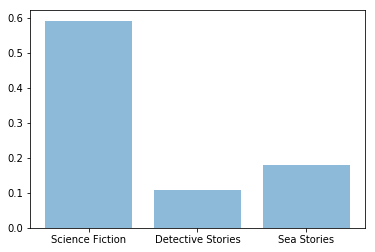

In [53]:
genres = ('Science Fiction', 'Detective Stories', 'Sea Stories')
labels = np.arange(len(genres))
ratios = [scifiratio,detectiveratio,searatio]

pp.bar(labels, ratios, align='center', alpha=0.5)
pp.xticks(labels, genres)

pp.show()

And the average frequencies across the genres:

[Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Detective Stories'),
 Text(0, 0, 'Sea Stories')]

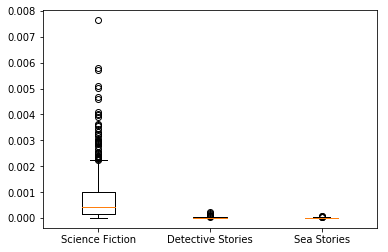

In [54]:
ax = pp.axes()
listoffrequencies = [scififrequencies,detectivefrequencies, seafrequencies]
bp = ax.boxplot(listoffrequencies)
ax.set_xticklabels(['Science Fiction', 'Detective Stories', 'Sea Stories'])

We can see that not only does the LCSH for Science Fiction contain many more books percentage-wise that make mention of a "planet" than the other two categories, but the the books that make mention of planet also do so at a significantly higher rate.  For this word, at least, my initial hypothesis appears to hold.

<h3> Plots with the words "star" and "moon":

Now I examine the other two keywords using the same methods as above.

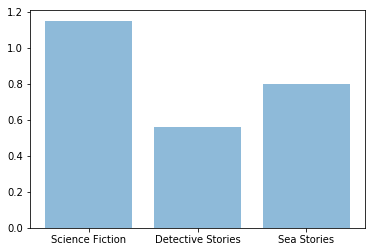

In [56]:
scifiratio = createFrequencyList(scififrequencies,scificollection,"star")
detectiveratio = createFrequencyList(detectivefrequencies,detectivecollection,"star")
searatio = createFrequencyList(seafrequencies,seacollection,"star")
genres = ('Science Fiction', 'Detective Stories', 'Sea Stories')
labels = np.arange(len(genres))
ratios = [scifiratio,detectiveratio,searatio]
pp.bar(labels, ratios, align='center', alpha=0.5)
pp.xticks(labels, genres)
pp.show()

[Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Detective Stories'),
 Text(0, 0, 'Sea Stories')]

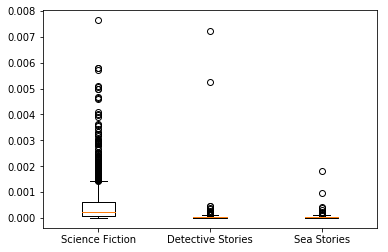

In [57]:
ax = pp.axes()
listoffrequencies = [scififrequencies,detectivefrequencies, seafrequencies]
bp = ax.boxplot(listoffrequencies)
ax.set_xticklabels(['Science Fiction', 'Detective Stories', 'Sea Stories'])

A higher percentage of books within science fiction make mention of the word "star," and the frequencies are higher, but neither is nearly as significant as "planet."

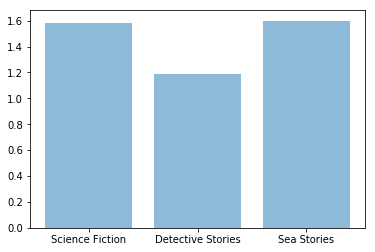

In [58]:
scifiratio = createFrequencyList(scififrequencies,scificollection,"moon")
detectiveratio = createFrequencyList(detectivefrequencies,detectivecollection,"moon")
searatio = createFrequencyList(seafrequencies,seacollection,"moon")
genres = ('Science Fiction', 'Detective Stories', 'Sea Stories')
labels = np.arange(len(genres))
ratios = [scifiratio,detectiveratio,searatio]
pp.bar(labels, ratios, align='center', alpha=0.5)
pp.xticks(labels, genres)
pp.show()

In [ ]:
ax = pp.axes()
listoffrequencies = [scififrequencies,detectivefrequencies, seafrequencies]
bp = ax.boxplot(listoffrequencies)
ax.set_xticklabels(['Science Fiction', 'Detective Stories', 'Sea Stories'])

"Moon" seems to not be so much of a distinguishing word at all.

<h3> Conclusions

Though my hypothesis was bolstered by the data for "planet," it was less clearly supported by plots of the latter two words.  Even though all three words represent astronomical objects, they do not necessarily cohere as a distinguishing category for SciFi.  Some questions for future investigation:

+ Would I get a different result if I went into texts and tried to disambiguate a word like "star"? 

+ What explains the prominence of the word "moon" in a genre like Sea Stories?  Does it serve a symbolic role?  Is it used in the context of navigation?

+ Are there other words that might be better grouped with a "planet"?  Perhaps words that are more scientific than "star" or "moon" but appropriate to the era in which this collection of SciFi literature was published.